## **Catulay, Weslie Jee L.**

**Supplementary**


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

fb = pd.read_csv(
  'fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
eq = pd.read_csv('earthquakes-1.csv')


In [4]:
eq = pd.read_csv('earthquakes-1.csv')
eq

,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California
3,0.44,ml,1539474978070,"9km NE of Aguanga, CA",0,California
4,2.16,md,1539474716050,"10km NW of Avenal, CA",0,California
...,...,...,...,...,...,...
9327,0.62,md,1537230228060,"9km ENE of Mammoth Lakes, CA",0,California
9328,1.00,ml,1537230135130,"3km W of Julian, CA",0,California
9329,2.40,md,1537229908180,"35km NNE of Hatillo, Puerto Rico",0,Puerto Rico
9330,1.10,ml,1537229545350,"9km NE of Aguanga, CA",0,California


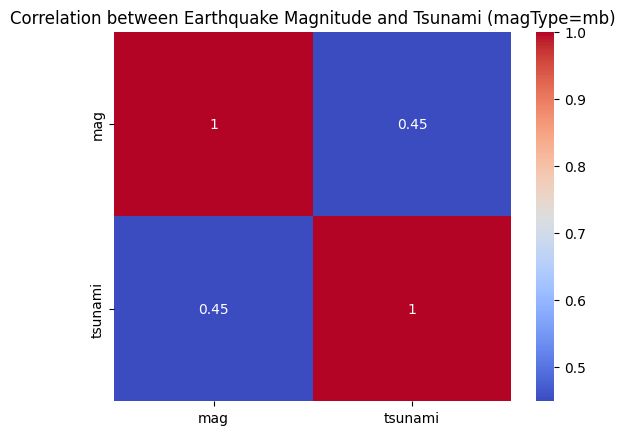

In [5]:
eq_mb = eq[(eq['magType'] == 'mb')]

correlation_matrix = eq_mb[['mag', 'tsunami']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Earthquake Magnitude and Tsunami (magType=mb)')
plt.show()

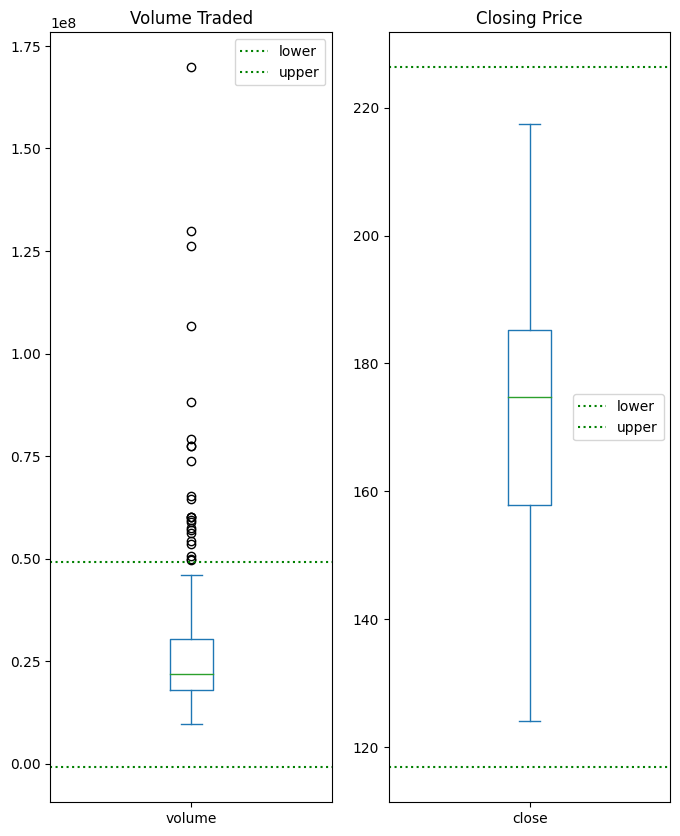

In [7]:
Vol = ['volume', 'close']
gra = fb[Vol]
qtl = gra.quantile([0.25, 0.75])
qtl.loc['iqr',:] = qtl.loc[0.75,:] - qtl.loc[0.25,:]

A = gra.plot(
    kind='box',
    subplots=True,
    figsize=(8, 10),
    title=['Volume Traded', 'Closing Price'])

for ax, col in zip(A, Vol):
  stats = qtl[col]
  lower = stats.loc[0.25] - 1.5 * stats['iqr']
  upper = stats.loc[0.75] + 1.5 * stats['iqr']
  for bound, name in zip([lower, upper], ['lower', 'upper']):
    ax.axhline( bound, color='green', linestyle='dotted', label=name )
    ax.legend()


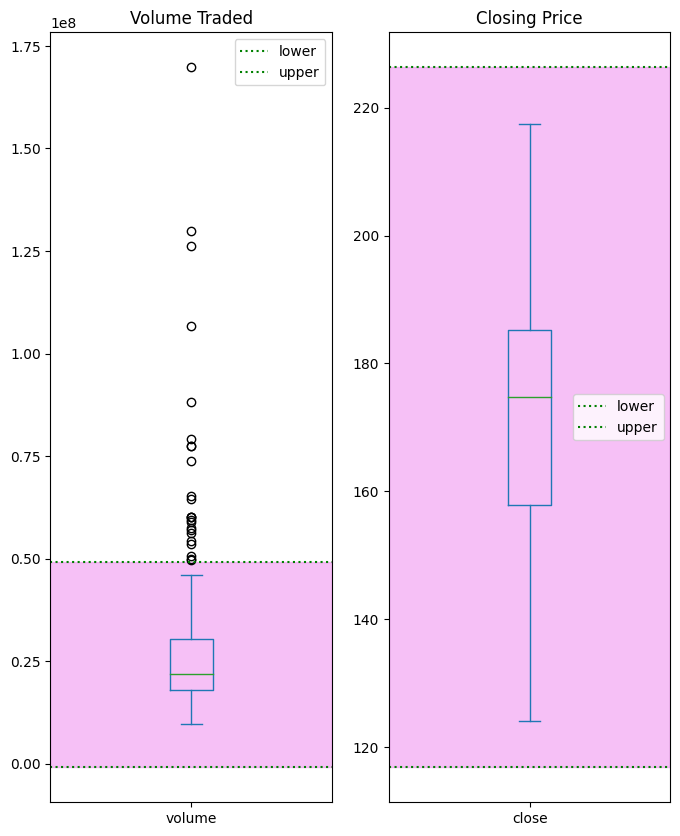

In [13]:
volum = ['volume', 'close']
graph = fb[volum]
qtl = graph.quantile([0.25, 0.75])
qtl.loc['iqr',:] = qtl.loc[0.75,:] - qtl.loc[0.25,:]

L = graph.plot(
    kind='box',
    subplots=True,
    figsize=(8, 10),
    title=['Volume Traded', 'Closing Price'])

for ax, col in zip(L, volum):
  stats = qtl[col]
  lower = stats.loc[0.25] - 1.5 * stats['iqr']
  upper = stats.loc[0.75] + 1.5 * stats['iqr']
  for bound, name in zip([lower, upper], ['lower', 'upper']):
    ax.axhline( bound, color='green', linestyle='dotted', label=name )
    ax.legend()
  ax.axhspan(lower, upper, color='violet', alpha=0.5)

In [14]:
fb = pd.read_csv('fb_stock_prices_2018.csv')
fb['date'] = pd.to_datetime(fb['date'])
fb.set_index('date', inplace = True)


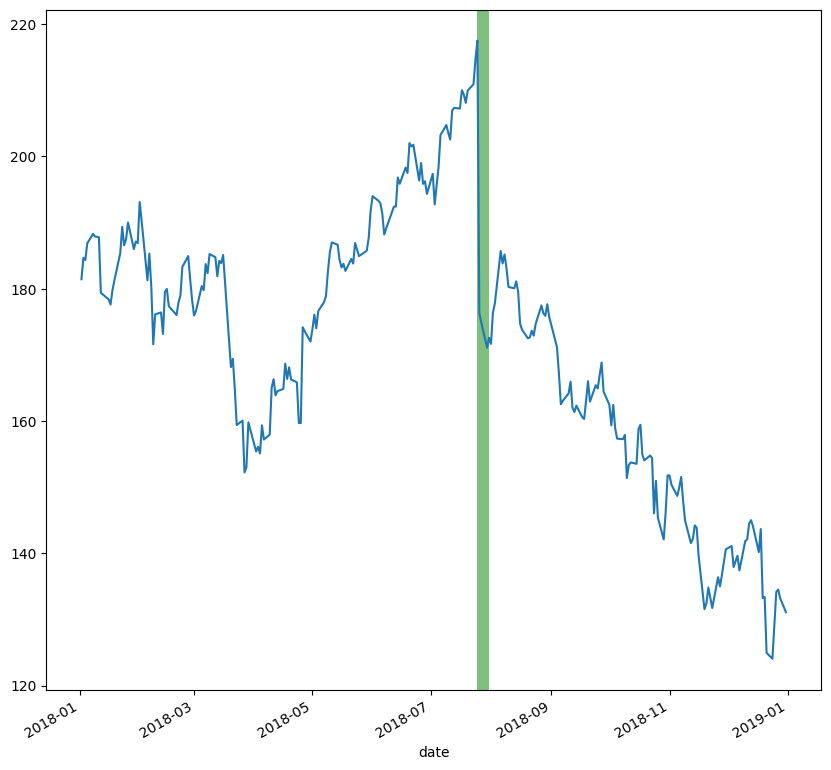

In [17]:
start = '2018-07-25'
end = '2018-07-31'

fb.close.plot(figsize = (10,10))
plt.axvspan(start, end, facecolor = 'green', alpha = 0.5)


Text(17610.0, 168.15, 'FTC launches investigation')

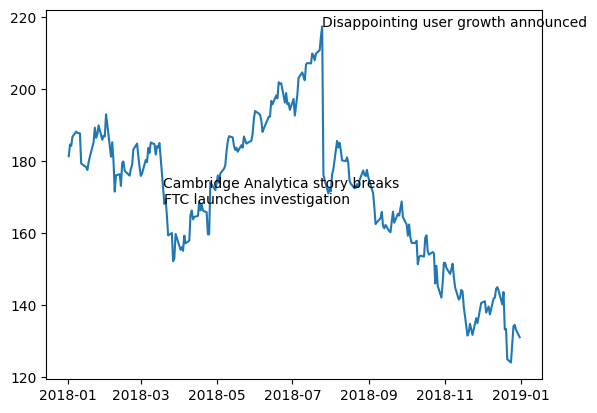

In [18]:
import matplotlib.dates as plt_date

plt.plot(fb.close)
plt.annotate('Disappointing user growth announced',
             xy=(plt_date.date2num(pd.to_datetime('2018-07-25')), fb.loc['2018-07-25', 'close']))
plt.annotate('Cambridge Analytica story breaks',
             xy=(plt_date.date2num(pd.to_datetime('2018-03-19')), fb.loc['2018-03-19', 'close']))
plt.annotate('FTC launches investigation',
             xy=(plt_date.date2num(pd.to_datetime('2018-03-20')), fb.loc['2018-03-20', 'close']))

<ipython-input-22-cf848bd48bdb>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  chplo = plt.cm.get_cmap('viridis')


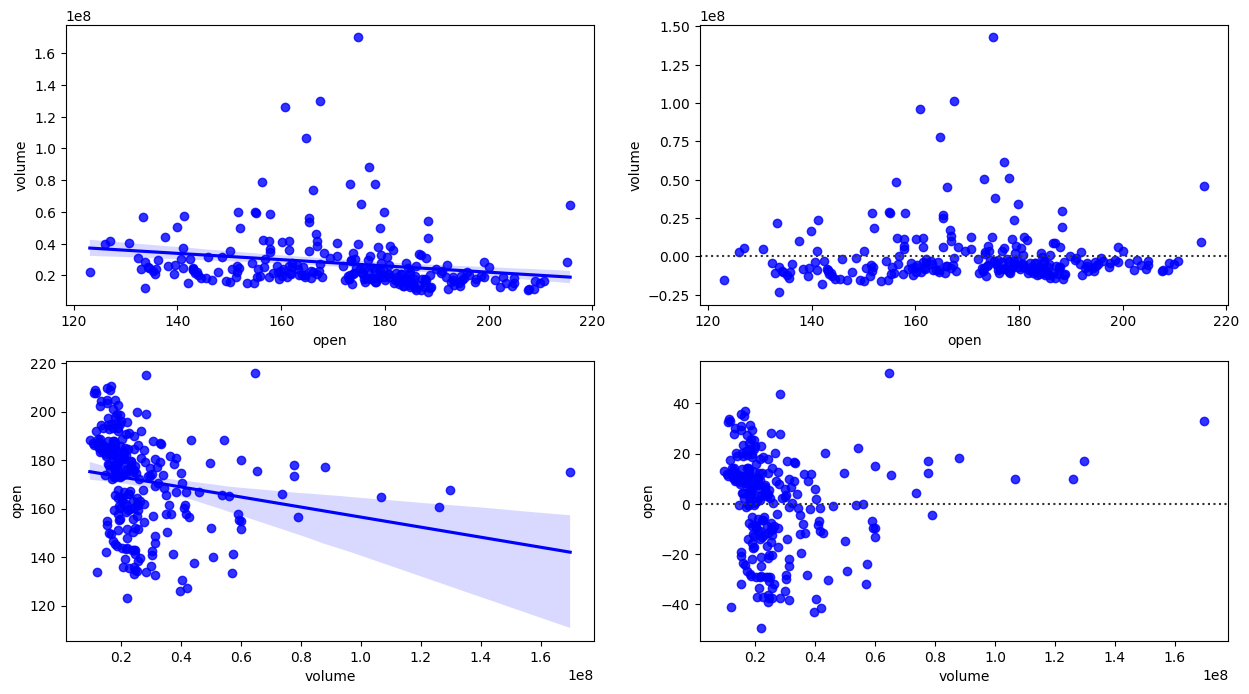

In [22]:
import itertools

def reg_resid_plots(data):

    graphs = data.shape[1]
    permutation_count = graphs * (graphs - 1)
    fig, ax = plt.subplots(permutation_count, 2, figsize=(15, 8))
    chplo = plt.cm.get_cmap('viridis')
    colors = [chplo(i) for i in np.linspace(0, 1, permutation_count)]
    for (x, y), axes, color in zip(
            itertools.permutations(data.columns, 2),
            ax,
            colors):
        for subplot, func in zip(axes, (sns.regplot, sns.residplot)):
            func(x=x, y=y, data=data, ax=subplot, color='blue')
    plt.close()
    return fig

reg_resid_plots(fb[['open', 'volume']])

**CONCLUSION**

For this supplementary activity i have learn and understand to use another methods especially this import the seaborn, this import will help me to utilize to adjust and edit the visualization and make my data analysis for box plots way more better and pleasing to the eyes and also in order for the audience easy to other the results of each data.
